# open3d tutorial

![image.png](attachment:image.png)

Open3D is an open-source library that supports rapid development of software that deals with 3D data

It was introduced by Qian-Yi Zhou, Jaesik Park and Vladlen Koltun – researchers at Intel Labs (research paper).


http://www.open3d.org/wordpress/wp-content/paper.pdf





# Environment Setup:

conda create -n open3denv python=3.6

conda activate open3denv

conda install -c open3d-admin open3d==0.8.0.0

Download dataset from :    http://graphics.stanford.edu/data/3Dscanrep/


In [1]:
!pip install open3d
!pip install opencv-python
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━ 229.3/420.5 MB 67.1 MB/s eta 0:00:03
ERROR: Operation cancelled by user


Just Depth image

In [ ]:
import open3d as o3d
import  cv2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio


In [ ]:
FX_DEPTH = 5.8262448167737955e+02
FY_DEPTH = 5.8269103270988637e+02
CX_DEPTH = 3.1304475870804731e+02
CY_DEPTH = 2.3844389626620386e+02

In [ ]:
depth_image = iio.imread('depth/1.png')

print(f"Image resolution: {depth_image.shape}")
print(f"Data type: {depth_image.dtype}")
print(f"Min value: {np.min(depth_image)}")
print(f"Max value: {np.max(depth_image)}")


Image resolution: (480, 640)
Data type: int32
Min value: 0
Max value: 4463


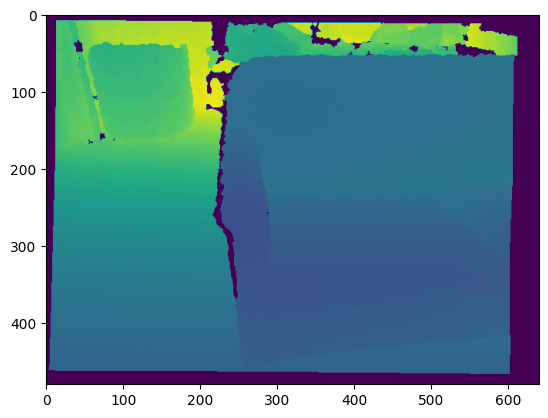

In [ ]:
imgplot = plt.imshow(depth_image)
plt.show()

In [ ]:
pcd = []
height, width = depth_image.shape
for i in range(height):
   for j in range(width):
       z = depth_image[i][j]
       x = (j - CX_DEPTH) * z / FX_DEPTH
       y = (i - CY_DEPTH) * z / FY_DEPTH
       pcd.append([x, y, z])

In [ ]:
pcd_o3d = o3d.geometry.PointCloud()  # create point cloud object
pcd_o3d.points = o3d.utility.Vector3dVector(pcd)  # set pcd_np as the point cloud points
# Visualize:
o3d.visualization.draw_plotly([pcd_o3d])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pcd_o3d = pcd_o3d.voxel_down_sample(voxel_size=50)
o3d.visualization.draw_plotly([pcd_o3d])

In [ ]:
alpha = 200
print(f"alpha={alpha:.3f}")
mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(pcd_o3d, alpha)
mesh.compute_vertex_normals()
o3d.visualization.draw_plotly([mesh])

alpha=200.000


Color + Depth image

In [ ]:
color_raw = o3d.io.read_image("color/2.jpg")
depth_raw = o3d.io.read_image("depth/2.png")
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw)
print(rgbd_image)

RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


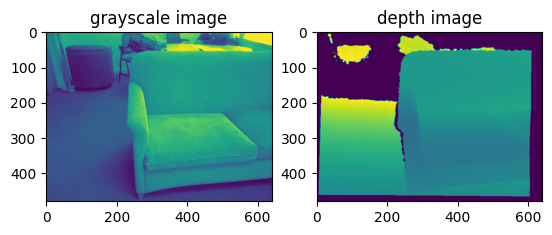

In [ ]:
plt.subplot(1, 2, 1)
plt.title('grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [ ]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_plotly([pcd], zoom=0.5)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pcd = pcd.voxel_down_sample(voxel_size=0.02)
o3d.visualization.draw_plotly([pcd])

In [ ]:
alpha = 0.1
print(f"alpha={alpha:.3f}")
mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(pcd, alpha)
mesh.compute_vertex_normals()
o3d.visualization.draw_plotly([mesh])

alpha=0.100
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
